In [2]:
import cv2
import glob
import numpy as np
import glob
from matplotlib import pyplot as plt

In [3]:

img = cv2.imread('./images/img4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img,(200, 200))

img_data = np.float32(img.reshape(img.shape[0] * img.shape[1],3))


In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags 
flags = cv2.KMEANS_RANDOM_CENTERS

K=3

# Apply KMeans
compactness,labels,centers = cv2.kmeans(img_data,K,None,criteria,10,flags)
centers = np.uint8(centers)
print(centers)
labels

[[114 133 140]
 [171 203 215]
 [ 49  53  49]]


array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int32)

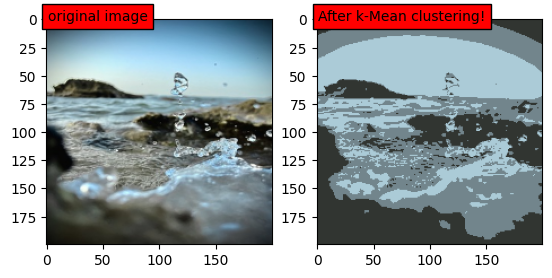

In [5]:
clustered_img = centers[labels.flatten()]
clustered_img = clustered_img.reshape((img.shape))
plt.subplot(1,2,1)
plt.text(1,1, "original image", fontsize=10, bbox=dict(facecolor='red', alpha=1))
plt.imshow(img)
plt.subplot(1,2,2)
plt.text(1,1, "After k-Mean clustering!", fontsize=10, bbox=dict(facecolor='red', alpha=1))
plt.imshow(clustered_img)
plt.show()


In [6]:
# conctaed images histrogram

images = list(cv2.imread(file) for file in glob.glob("./images/*.jpg"))

concated_img = images[0]
for img in images[1:]:
    concated_img = np.concatenate((concated_img, img), axis=1)
    #concated_img = np.column_stack((concated_img,img))

concated_img=cv2.cvtColor(concated_img, cv2.COLOR_BGR2RGB)

img_data = np.float32(concated_img.reshape(concated_img.shape[0] * concated_img.shape[1],3))

In [7]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags 
flags = cv2.KMEANS_RANDOM_CENTERS

K = 128
# Apply KMeans
compactness,labels,centers = cv2.kmeans(img_data,K,None,criteria,10,flags)
centers = np.uint8(centers)
print(centers)

[[159  24  38]
 [141  92  43]
 [204 124 121]
 [184  27   7]
 [149  66 189]
 [144   7  25]
 [214  89 178]
 [173  58  65]
 [142  22  33]
 [171 100 210]
 [220  47  18]
 [169  87  26]
 [ 70  42  23]
 [ 31  72   9]
 [139  40  50]
 [133  10  25]
 [ 56  54  49]
 [174 103 100]
 [129  22  30]
 [134  33  32]
 [122  32  42]
 [164 114  52]
 [133  17  21]
 [133  60  17]
 [ 63  66  71]
 [124  22  22]
 [129  52   5]
 [ 73  72 104]
 [ 88  98 121]
 [116  24   6]
 [126  16  28]
 [ 50  36  23]
 [117  39  82]
 [173 189 196]
 [ 28  28  25]
 [151  72 219]
 [ 97 132 158]
 [129  72  67]
 [121  12  22]
 [113  23  23]
 [133  40  15]
 [117  25  24]
 [126   4  23]
 [131  55  32]
 [ 45  22  21]
 [108  15  51]
 [117  51  18]
 [120  35  30]
 [155   3  30]
 [218 212 211]
 [102  43  20]
 [107  59  52]
 [154  65  10]
 [246 156 225]
 [  1   1   1]
 [ 91  54  89]
 [120  41   4]
 [130   6   5]
 [126  72  32]
 [ 70  42  90]
 [115  88  45]
 [114   6  22]
 [ 25   6   2]
 [115  38  21]
 [124 129 132]
 [116  24  31]
 [ 67 102 

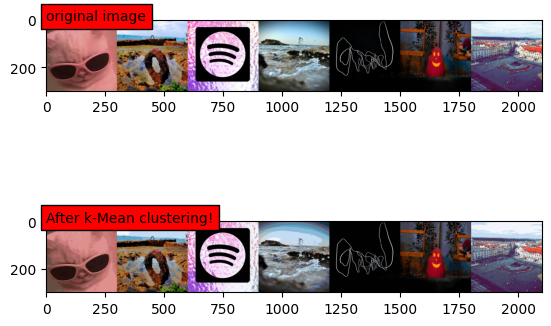

In [8]:
clustered_img = centers[labels.flatten()]
clustered_img = clustered_img.reshape((concated_img.shape))
plt.subplot(2,1,1)
plt.text(1,1, "original image", fontsize=10, bbox=dict(facecolor='red', alpha=1))
plt.imshow(concated_img)
plt.subplot(2,1,2)
plt.text(1,1, "After k-Mean clustering!", fontsize=10, bbox=dict(facecolor='red', alpha=1))
plt.imshow(clustered_img)
plt.show()

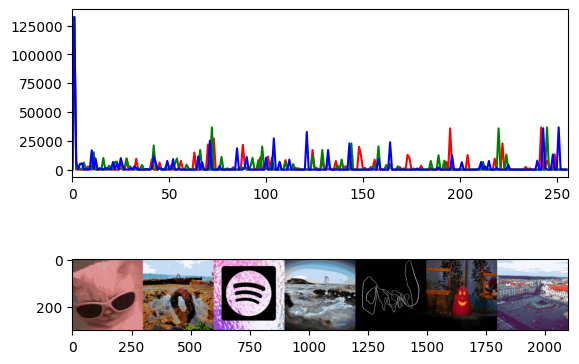

In [9]:
colors=('r','g','b')

for chnl_no,chnl_clr in enumerate(colors):
    histrogam = cv2.calcHist([clustered_img], [chnl_no],None,[256],[0,256])
    plt.subplot(2,1,1)
    plt.plot(histrogam,color = chnl_clr)
    plt.xlim([0,256])
plt.subplot(2,1,2)
plt.imshow(clustered_img)
plt.show()
